# Demonstration of using R with building data

In this demonstration, we will repeat to

- import and preprocess large amount of data
- use pandas to extract data based on date and time
- calculate average building power consumption
- visualize the data
- categorize the data by clustering

with R instead of Python 3

## Importing and preprocessing data

Similar to Python, we need a library to import data

In [24]:
library(readxl)

and we can read the _.xlsx_ file by _read_excel()_

In [25]:
df <- read_excel('DemoFile.xlsx')

In [26]:
df

Timestamp,5521_Building Load_TL Archive
2015-10-05 07:00:00,811.556
2015-10-05 07:30:00,862.906
2015-10-05 08:00:00,1621.230
2015-10-05 08:30:00,2124.810
2015-10-05 09:00:00,1963.140
2015-10-05 09:30:00,2301.970
2015-10-05 10:00:00,2199.330
2015-10-05 10:30:00,2254.840
2015-10-05 11:00:00,2190.060
2015-10-05 11:30:00,2120.130


Can we read the data from another worksheet?

In [27]:
df2 <- read_excel('DemoFile.xlsx', sheet = 'Sheet2')

In [28]:
df2

Timestamp,5509_Outdoor Temperature_TL Archive
2015-09-27 14:00:00,33.9162
2015-09-27 14:30:00,32.9700
2015-09-27 15:00:00,32.0537
2015-09-27 15:30:00,31.1224
2015-09-27 16:00:00,30.5015
2015-09-27 16:30:00,29.8865
2015-09-27 17:00:00,29.0987
2015-09-27 17:30:00,28.9018
2015-09-27 18:00:00,28.8033
2015-09-27 18:30:00,28.5079


Now we have two dataframes of data. Can we combine them into one for simplicity? __Yes!__

In [29]:
df_final <- merge(df, df2, 'Timestamp')

In [30]:
df_final

Timestamp,5521_Building Load_TL Archive,5509_Outdoor Temperature_TL Archive
2015-10-05 07:00:00,811.556,27.1294
2015-10-05 07:30:00,862.906,28.1140
2015-10-05 08:00:00,1621.230,28.1140
2015-10-05 08:30:00,2124.810,27.3263
2015-10-05 09:00:00,1963.140,28.8279
2015-10-05 09:30:00,2301.970,28.2125
2015-10-05 10:00:00,2199.330,28.0156
2015-10-05 10:30:00,2254.840,28.2125
2015-10-05 11:00:00,2190.060,28.5079
2015-10-05 11:30:00,2120.130,27.1294


The dataframes can be combined easily.

## Select data based on date and time

Let's try selecting some data based on date and time only. But will it be very difficult with date and time stored in text in the original file? __No!__

In this case, we use a function _as.POSIXct_

In [31]:
as.POSIXct('2014-01-02 16:00:00')
df_final$Timestamp[1]

[1] "2014-01-02 16:00:00 CST"

[1] "2015-10-05 07:00:00 UTC"

And we can compare the time by

In [32]:
as.POSIXct('2015-10-05 08:00:00', tz='UTC') > df_final$Timestamp[1]

[1] TRUE

Note that we need to specify the time zone because the computer time zone is used by default, but the building data uses Universal Time.

If I only want data in 2016 from the dataframe, all I need is

In [33]:
df_select <- df_final[which(df_final$Timestamp >= as.POSIXct('2016-01-01 00:00:00', tz='UTC') &
                            df_final$Timestamp < as.POSIXct('2017-01-01 00:00:00', tz='UTC')), ]

In [34]:
df_select

,Timestamp,5521_Building Load_TL Archive,5509_Outdoor Temperature_TL Archive
7913,2016-01-01 00:00:00,0.00000,18.5297
7914,2016-01-01 00:15:00,-5.34606,18.4343
7915,2016-01-01 00:30:00,-16.24000,18.3664
7916,2016-01-01 00:45:00,176.48500,18.3627
7917,2016-01-01 01:00:00,551.20000,18.3389
7918,2016-01-01 01:15:00,548.25600,18.1481
7919,2016-01-01 01:30:00,510.40500,18.1481
7920,2016-01-01 01:45:00,473.17000,18.1481
7921,2016-01-01 02:00:00,17.81480,18.0434
7922,2016-01-01 02:15:00,-16.59450,17.9573


And the technique is similar if you want data based on temperature. If you want data which temperature is between 28C and 30C only, you just need

In [35]:
df_select2 <- df_select[which((df_select['5509_Outdoor Temperature_TL Archive'] >= 28) &
                              (df_select['5509_Outdoor Temperature_TL Archive'] <= 30)), ]

In [36]:
df_select2

,Timestamp,5521_Building Load_TL Archive,5509_Outdoor Temperature_TL Archive
7958,2016-01-01 11:15:00,0.00000,29.0003
7959,2016-01-01 11:30:00,25.22380,28.9902
7966,2016-01-01 13:15:00,-24.40560,29.8865
7968,2016-01-01 13:45:00,0.00000,29.5911
7973,2016-01-01 15:00:00,549.72200,29.6895
7977,2016-01-01 16:00:00,-13.53570,29.6895
7978,2016-01-01 16:15:00,0.00000,28.8033
7979,2016-01-01 16:30:00,6.50726,28.6253
8252,2016-01-04 12:45:00,1599.19000,28.2837
8254,2016-01-04 13:15:00,1625.28000,29.5911


## Calculating mean building load

Want to know the mean building load within the selected data? All you need is

In [37]:
lapply(df_select2['5521_Building Load_TL Archive'], mean, na.rm=TRUE)

$`5521_Building Load_TL Archive`
[1] 1241.92

## Data visualization

It's difficult to see what's going on with all the data, right? For example, how can we know the load pattern in July 2016? First, let's extract the data

In [38]:
df_select3 <- df_final[which(df_final$Timestamp >= as.POSIXct('2016-07-01 00:00:00', tz='UTC') &
                             df_final$Timestamp < as.POSIXct('2016-08-01 00:00:00', tz='UTC')), ]

In [39]:
df_select3

,Timestamp,5521_Building Load_TL Archive,5509_Outdoor Temperature_TL Archive
20788,2016-07-01 00:00:00,1034.070,28.2125
20789,2016-07-01 00:15:00,1012.130,28.4094
20790,2016-07-01 00:30:00,1050.430,28.5030
20791,2016-07-01 00:45:00,1012.630,28.3937
20792,2016-07-01 01:00:00,1041.030,28.3819
20793,2016-07-01 01:15:00,951.270,28.3732
20794,2016-07-01 01:30:00,999.978,28.5079
20795,2016-07-01 01:45:00,961.788,28.4094
20796,2016-07-01 02:00:00,1000.350,28.3957
20797,2016-07-01 02:15:00,1013.580,28.2125


To plot the diagrams, we use _ggplot2_. Its syntax is very different _MATLAB_ and _matplotlib_ because it uses Grammar of Graphics

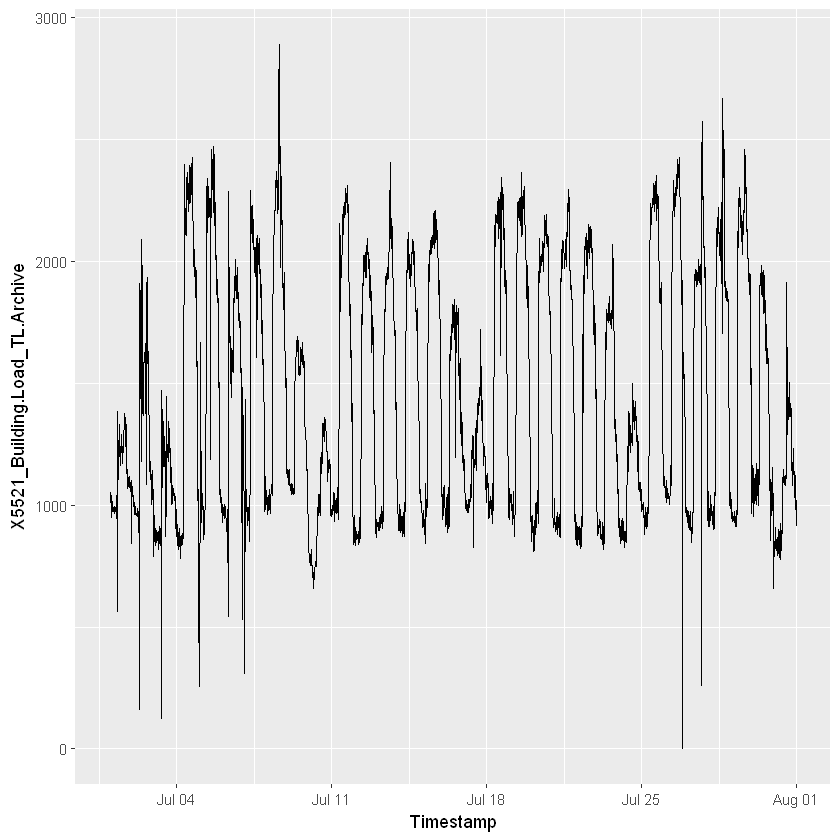

In [40]:
library(ggplot2)
names(df_select3) <- make.names(names(df_select3))  # change the names for easier use with ggplot
ggplot(df_select3, aes(x=Timestamp, y=X5521_Building.Load_TL.Archive))+geom_line()

Let's organize the timestamp first and visualize the data again. We create a new column using the time of the timestamp only.

In [41]:
df_select3$TimeHour <- sapply(df_select3$Timestamp, function(x) as.POSIXlt(x, tz='UTC')$hour)

In [42]:
df_select3

,Timestamp,X5521_Building.Load_TL.Archive,X5509_Outdoor.Temperature_TL.Archive,TimeHour
20788,2016-07-01 00:00:00,1034.070,28.2125,0
20789,2016-07-01 00:15:00,1012.130,28.4094,0
20790,2016-07-01 00:30:00,1050.430,28.5030,0
20791,2016-07-01 00:45:00,1012.630,28.3937,0
20792,2016-07-01 01:00:00,1041.030,28.3819,1
20793,2016-07-01 01:15:00,951.270,28.3732,1
20794,2016-07-01 01:30:00,999.978,28.5079,1
20795,2016-07-01 01:45:00,961.788,28.4094,1
20796,2016-07-01 02:00:00,1000.350,28.3957,2
20797,2016-07-01 02:15:00,1013.580,28.2125,2


And let's make a box plot using the new time column and the building load column

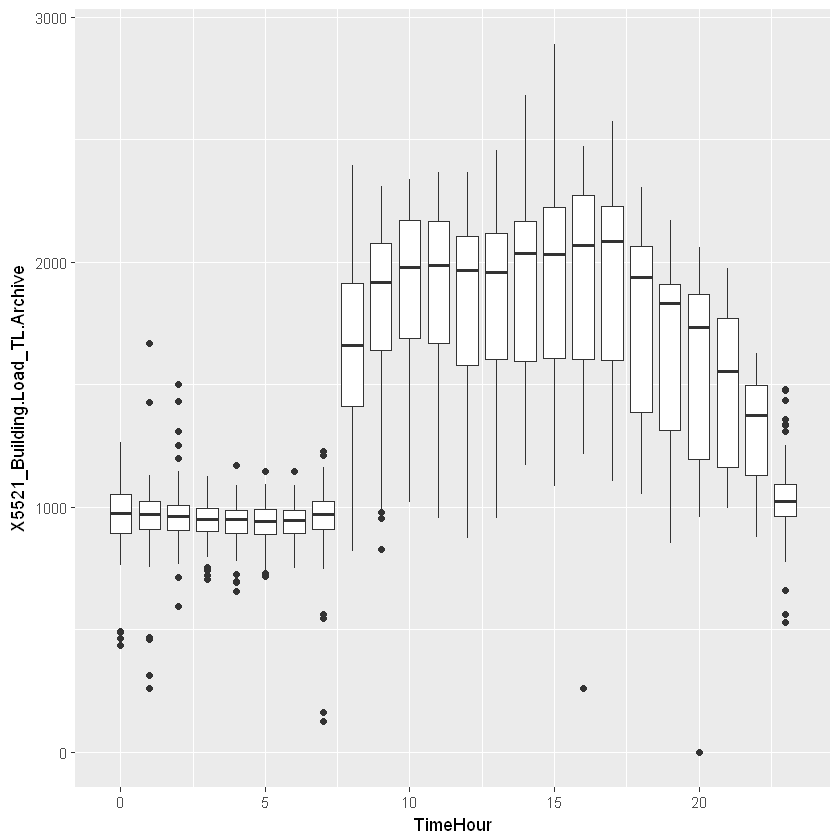

In [43]:
ggplot(df_select3, aes(TimeHour, X5521_Building.Load_TL.Archive, group=TimeHour)) + geom_boxplot()

## Clustering

Now let's do clustering with R by k-means! Unlike _Python_, k-means in _R_ resides in an internal library so no import is needed. We can do it right away!

In [44]:
df_select3$Class <- kmeans(df_select3[, c('X5521_Building.Load_TL.Archive',
                                          'X5509_Outdoor.Temperature_TL.Archive',
                                          'TimeHour')], 4)$cluster

In [45]:
df_select3

,Timestamp,X5521_Building.Load_TL.Archive,X5509_Outdoor.Temperature_TL.Archive,TimeHour,Class
20788,2016-07-01 00:00:00,1034.070,28.2125,0,3
20789,2016-07-01 00:15:00,1012.130,28.4094,0,3
20790,2016-07-01 00:30:00,1050.430,28.5030,0,3
20791,2016-07-01 00:45:00,1012.630,28.3937,0,3
20792,2016-07-01 01:00:00,1041.030,28.3819,1,3
20793,2016-07-01 01:15:00,951.270,28.3732,1,3
20794,2016-07-01 01:30:00,999.978,28.5079,1,3
20795,2016-07-01 01:45:00,961.788,28.4094,1,3
20796,2016-07-01 02:00:00,1000.350,28.3957,2,3
20797,2016-07-01 02:15:00,1013.580,28.2125,2,3


Let's see what will happen if we make the same plot as our _Python_ example.

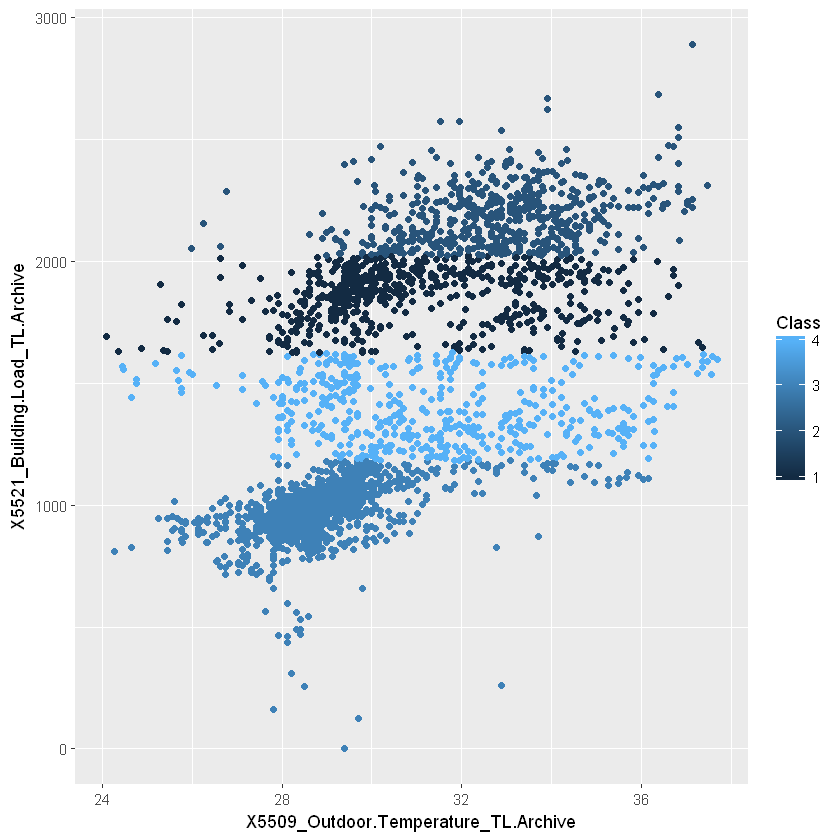

In [46]:
ggplot(df_select3, aes(x=X5509_Outdoor.Temperature_TL.Archive,
                       y=X5521_Building.Load_TL.Archive,
                       color=Class))+geom_point()